# **Superstore Sales Analysis and Visualization**

## Project Overview  
This project performs an exploratory data analysis (EDA) on the Superstore Sales dataset. The goal is to understand sales patterns, profit margins, and customer behaviors through statistical summaries and visualizations. This analysis provides actionable insights to improve business performance and decision-making.

---

## Dataset  
- Source: Publicly available “Superstore Sales” dataset (CSV format)  
- Contents: Sales transactions including order IDs, product categories, sales amounts, profits, shipping costs, discounts, dates, and customer regions.

---

## Objectives  
- Load and clean the data  
- Explore key metrics: total sales, profits, discounts, and order quantities  
- Visualize sales trends over time (monthly)  
- Analyze profit and sales relationships  
- Identify best-performing regions and product categories  
- Summarize key insights to guide business decisions

---

## Tools & Libraries Used  
- Python 3.x  
- Pandas (Data manipulation)  
- Matplotlib & Seaborn (Data visualization)


## Project Steps

### 1. Data Loading and Cleaning  
- Imported CSV file into a Pandas DataFrame  
- Converted date columns to datetime format  
- Dropped irrelevant columns like `Postal Code`

In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Read the CSV file into a pandas DataFrame
# Note: If the file contains special characters (e.g., Arabic, Persian, or European chars),
# consider specifying encoding like 'ISO-8859-1' or 'utf-8' if errors occur.
df = pd.read_csv("/content/Superstore-Sales 2.csv")

In [ ]:
# Display the first 5 rows of the DataFrame to inspect the data structure
# This helps verify successful loading and check column names/datatypes
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10-01-12,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10-02-12
2,50,293,10-01-12,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10-03-12
3,80,483,07-10-11,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,07-12-11
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


In [ ]:
# Display the last 5 rows of the DataFrame
# Useful for checking:
# - Data completeness (end of dataset)
# - Consistency with df.head() results
# - Data types in each column
df.tail()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
8394,7765,55558,08-09-10,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,08-09-10
8395,7766,55558,08-09-10,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,08-11-10
8396,7906,56550,04-08-11,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,04-10-11
8397,7907,56550,04-08-11,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,04-09-11
8398,7914,56581,02-08-09,High,20,2026.0100,0.10,Express Air,580.43,105.98,...,Grant Donatelli,Alberta,West,Consumer,Furniture,Office Furnishings,"Tenex 46"" x 60"" Computer Anti-Static Chairmat,...",Medium Box,0.65,02-11-09


In [ ]:
# Display concise summary of the DataFrame including:
# - Column names and data types
# - Non-null counts (missing value detection)
# - Memory usage
# Essential for data validation and cleaning preparation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  Customer Name         8399 non-null   object 
 12  Province              8399 non-null   object 
 13  Region                8399 non-null   object 
 14  Customer Segment      8399 non-null   object 
 15  Product Category     

In [ ]:
# Generate descriptive statistics summary for numerical columns including:
# - Count: Number of non-null values
# - Mean: Average value
# - Std: Standard deviation (measure of dispersion)
# - Min/Max: Range of values
# - 25%/50%/75%: Quartile boundaries
# Useful for:
# - Understanding data distribution
# - Identifying outliers
# - Initial feature analysis
df.describe()

,Row ID,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,4200.000000,29965.179783,25.571735,1775.878179,0.049671,181.184424,89.346259,12.838557,0.512513
std,2424.726789,17260.883447,14.481071,3585.050525,0.031823,1196.653371,290.354383,17.264052,0.135589
min,1.000000,3.000000,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000,0.350000
25%,2100.500000,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,0.380000
50%,4200.000000,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,0.520000
75%,6299.500000,44596.000000,38.000000,1709.320000,0.080000,162.750000,85.990000,13.990000,0.590000
max,8399.000000,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000


In [ ]:
# Generate comprehensive statistics including:
# - Numerical columns: count, mean, std, min, quartiles, max
# - Categorical columns: count, unique, top, frequency
# (Use include='all' parameter for mixed data types)
df.describe(include='all')

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
count,8399.000000,8399.000000,8399,8399,8399.000000,8399.000000,8399.000000,8399,8399.000000,8399.000000,...,8399,8399,8399,8399,8399,8399,8399,8399,8336.000000,8399
unique,NaN,NaN,1418,5,NaN,NaN,NaN,3,NaN,NaN,...,795,13,8,4,3,17,1263,7,NaN,1450
top,NaN,NaN,9/15/2011,High,NaN,NaN,NaN,Regular Air,NaN,NaN,...,Darren Budd,Ontario,West,Corporate,Office Supplies,Paper,"Global High-Back Leather Tilter, Burgundy",Small Box,NaN,5/21/2011
freq,NaN,NaN,20,1768,NaN,NaN,NaN,6270,NaN,NaN,...,41,1826,1991,3076,4610,1225,24,4347,NaN,19
mean,4200.000000,29965.179783,NaN,NaN,25.571735,1775.878179,0.049671,NaN,181.184424,89.346259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.512513,NaN
std,2424.726789,17260.883447,NaN,NaN,14.481071,3585.050525,0.031823,NaN,1196.653371,290.354383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135589,NaN
min,1.000000,3.000000,NaN,NaN,1.000000,2.240000,0.000000,NaN,-14140.700000,0.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350000,NaN
25%,2100.500000,15011.500000,NaN,NaN,13.000000,143.195000,0.020000,NaN,-83.315000,6.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.380000,NaN
50%,4200.000000,29857.000000,NaN,NaN,26.000000,449.420000,0.050000,NaN,-1.500000,20.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520000,NaN
75%,6299.500000,44596.000000,NaN,NaN,38.000000,1709.320000,0.080000,NaN,162.750000,85.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,NaN


In [ ]:
# Remove the 'Postal Code' column from the DataFrame with the following parameters:
# - columns=["Postal Code"]: Specifies column(s) to remove
# - inplace=True: Modifies the DataFrame directly instead of returning a new one
# - errors='ignore': Silently continues if column doesn't exist (prevents errors)
# Useful for:
# - Removing unnecessary or sensitive data
# - Reducing memory usage
# - Preparing data for analysis by eliminating irrelevant features
df.drop(columns=["Postal Code"], inplace=True, errors='ignore')

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m-%d-%y', errors='coerce')

In [ ]:
# Convert 'Order Date' column to datetime with robust error handling
try:
    # First attempt with inferred format (handles most common cases)
    df['Order Date'] = pd.to_datetime(df['Order Date'],
                                    errors='coerce',
                                    dayfirst=False)  # Try month-first format

    # Check for remaining null values indicating conversion failures
    if df['Order Date'].isna().any():
        print(f"Warning: {df['Order Date'].isna().sum()} dates failed initial conversion")

        # Second attempt with day-first format (common in European/International dates)
        df['Order Date'] = pd.to_datetime(df['Order Date'],
                                        errors='coerce',
                                        dayfirst=True)

        # Final check
        if df['Order Date'].isna().any():
            print(f"Still {df['Order Date'].isna().sum()} conversion failures")
            print("Sample problem dates:", df.loc[df['Order Date'].isna(), 'Order Date'].head().tolist())

except Exception as e:
    print(f"Conversion failed: {str(e)}")
    print("Sample date values:", df['Order Date'].head().tolist())

Still 4947 conversion failures
Sample problem dates: [NaT, NaT, NaT, NaT, NaT]


In [ ]:
# Convert 'Ship Date' column to datetime format for proper date handling
# Key advantages:
# 1. Enables time-based calculations (e.g., days between order and shipment)
# 2. Facilitates time-series analysis and period comparisons
# 3. Allows proper sorting by actual date rather than string values
#
# Using errors='coerce' will convert unparsable dates to NaT (Not a Time)
# instead of raising errors - recommended for data cleaning
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')



Sales by Region (USD):
Region
West                     $3,597,549.28
Ontario                  $3,063,212.48
Prarie                   $2,837,304.60
Atlantic                 $2,014,248.20
Quebec                   $1,510,195.08
Yukon                      $975,867.37
Northwest Territories      $800,847.33
Nunavut                    $116,376.48


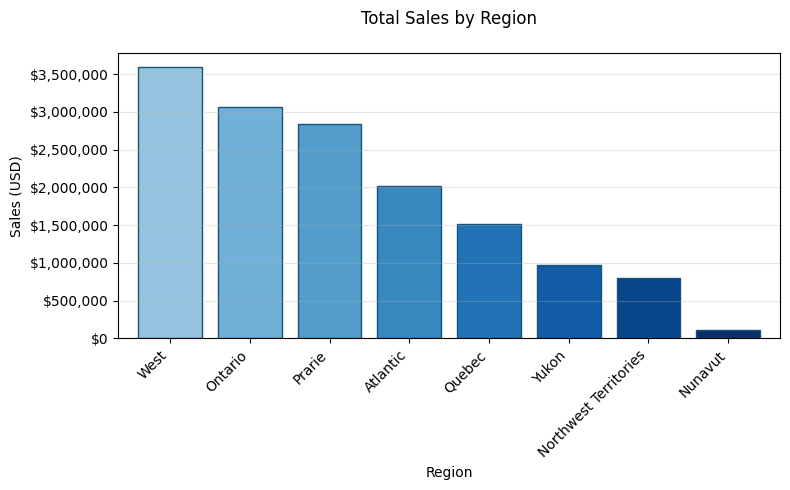

In [ ]:
# Calculate total sales by region:
# 1. Group data by 'Region' column
# 2. Sum the 'Sales' values for each region
# 3. Sort results in descending order (highest sales first)
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Create a bar plot visualization with enhanced styling:
# - kind='bar': Vertical bar chart
# - title: Descriptive title with padding
# - ylabel/xlabel: Axis labels with units
# - figsize: Width=8 inches, Height=5 inches (better proportions)
# - color: Professional blue gradient
# - edgecolor: Darker edges for definition
region_sales.plot(kind='bar',
                 title='Total Sales by Region\n',  # Added newline for spacing
                 ylabel="Sales (USD)",
                 xlabel="Region",
                 figsize=(8, 5),
                 color=plt.cm.Blues(np.linspace(0.4, 1, len(region_sales))),
                 edgecolor='#1a5276',
                 width=0.8)  # Optimal bar width

# Add professional touches
plt.xticks(rotation=45, ha='right')  # Better label rotation
plt.grid(axis='y', alpha=0.3)  # Light horizontal grid
plt.gca().yaxis.set_major_formatter('${x:,.0f}')  # Currency formatting
plt.tight_layout()  # Prevent label cutoff

# Display the raw sales numbers for reference:
# Shows exact values that correspond to the visualization
print("\nSales by Region (USD):")
print(region_sales.apply(lambda x: f"${x:,.2f}").to_string())

plt.show()


Sales by Region (USD):
Region
West                     $3,597,549.28
Ontario                  $3,063,212.48
Prarie                   $2,837,304.60
Atlantic                 $2,014,248.20
Quebec                   $1,510,195.08
Yukon                      $975,867.37
Northwest Territories      $800,847.33
Nunavut                    $116,376.48


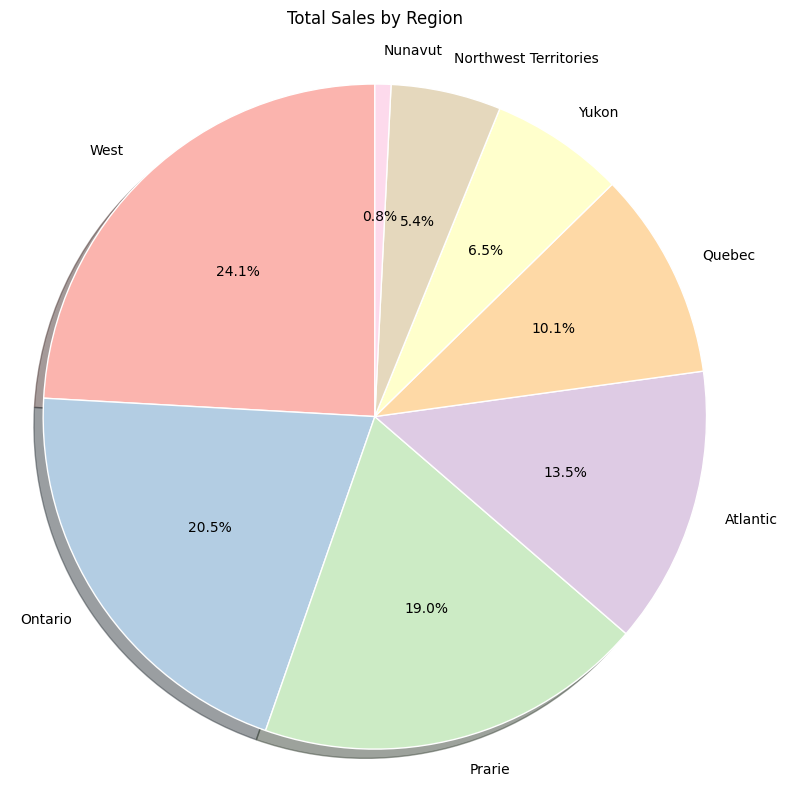

In [ ]:
# Create a pie chart visualization with better formatting:
# - kind='pie': Circular chart showing proportions
# - title: Descriptive title with padding
# - ylabel: Removed (not needed for pie charts)
# - xlabel: Removed (not needed for pie charts)
# - figsize: Width=8, Height=8 (better for circular display)
# - autopct: Show percentages with 1 decimal
# - startangle: Rotate starting position to 90 degrees
# - colors: Professional color palette
# - shadow: Add subtle depth effect
region_sales.plot(kind='pie',
                 title='Total Sales by Region\n',  # Newline for spacing
                 figsize=(8, 8),  # Square aspect ratio
                 autopct='%1.1f%%',
                 startangle=90,
                 colors=plt.cm.Pastel1(range(len(region_sales))),
                 shadow=True,
                 wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Add professional touches
plt.axis('equal')  # Perfect circle
plt.ylabel('')  # Remove empty y-label
plt.tight_layout()  # Prevent label cutoff

# Display the raw sales numbers for reference:
print("\nSales by Region (USD):")
print(region_sales.apply(lambda x: f"${x:,.2f}").to_string())

plt.show()


Regional Sales Breakdown:
Region
West                     $3,597,549.28
Ontario                  $3,063,212.48
Prarie                   $2,837,304.60
Atlantic                 $2,014,248.20
Quebec                   $1,510,195.08
Yukon                      $975,867.37
Northwest Territories      $800,847.33
Nunavut                    $116,376.48


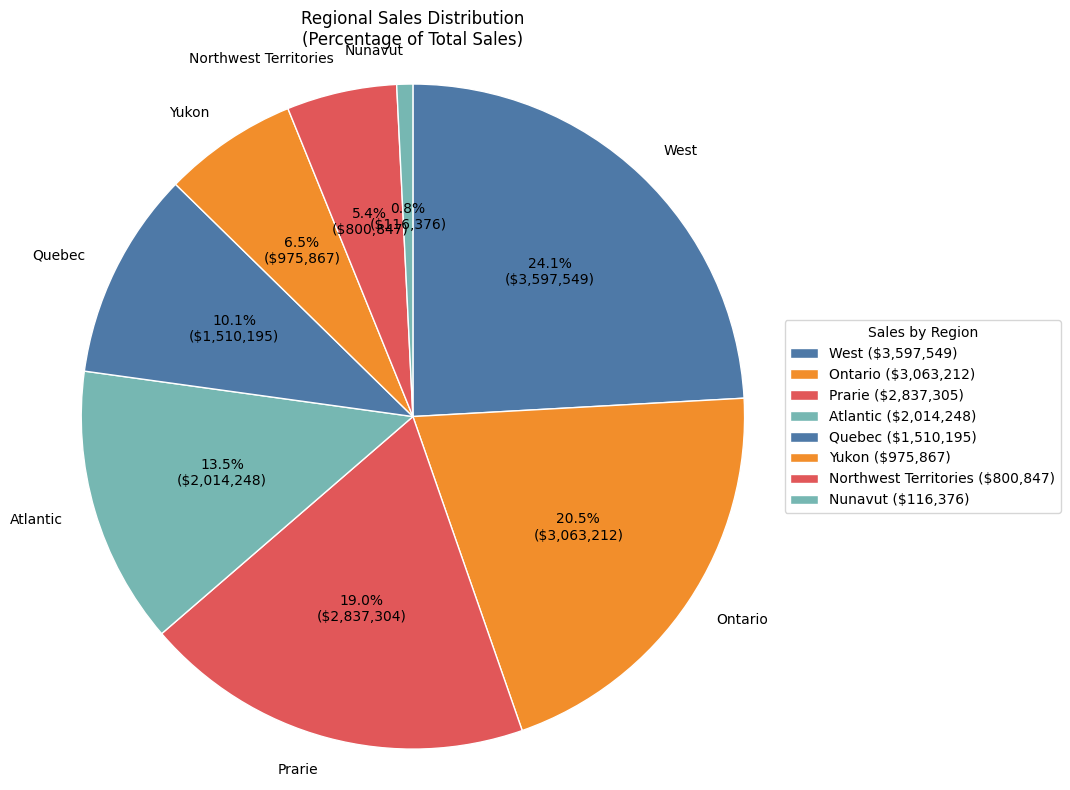

In [ ]:
# Generate a professional pie chart of regional sales distribution:
# - Visualizes percentage contribution of each region
# - Emphasizes regional performance at a glance
plt.figure(figsize=(8, 8))  # Square layout for better proportions

# Create the pie chart with enhanced parameters:
region_sales.plot(kind='pie',
                title='Regional Sales Distribution\n(Percentage of Total Sales)',
                autopct=lambda p: f'{p:.1f}%\n(${p*sum(region_sales)/100:,.0f})',  # Shows both % and $ value
                startangle=90,  # Starts first slice at top
                counterclock=False,  # Arrange slices clockwise
                colors=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'],  # Colorblind-friendly palette
                wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  # Clean edge styling
                textprops={'fontsize': 10})  # Label font size

# Professional formatting:
plt.axis('equal')  # Perfect circle
plt.ylabel('')  # Remove default y-label
plt.tight_layout()  # Prevent label cutoff

# Add legend with absolute values:
plt.legend(labels=[f"{region} (${sales:,.0f})"
                  for region, sales in region_sales.items()],
           title="Sales by Region",
           bbox_to_anchor=(1, 0.5),  # Position legend to right
           loc='center left')

# Display the underlying data:
print("\nRegional Sales Breakdown:")
print(region_sales.apply(lambda x: f"${x:,.2f}").to_string())

plt.show()

In [ ]:
# Display all column names in the DataFrame
# Useful for:
# 1. Verifying successful data loading
# 2. Checking column name formatting (spaces, special characters)
# 3. Planning data transformations or analyses
# Returns: Index object containing column names
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [ ]:
# Optional enhancements for better readability:
print("DataFrame Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

DataFrame Columns:
1. Row ID
2. Order ID
3. Order Date
4. Order Priority
5. Order Quantity
6. Sales
7. Discount
8. Ship Mode
9. Profit
10. Unit Price
11. Shipping Cost
12. Customer Name
13. Province
14. Region
15. Customer Segment
16. Product Category
17. Product Sub-Category
18. Product Name
19. Product Container
20. Product Base Margin
21. Ship Date


/tmp/ipython-input-117-2455994949.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




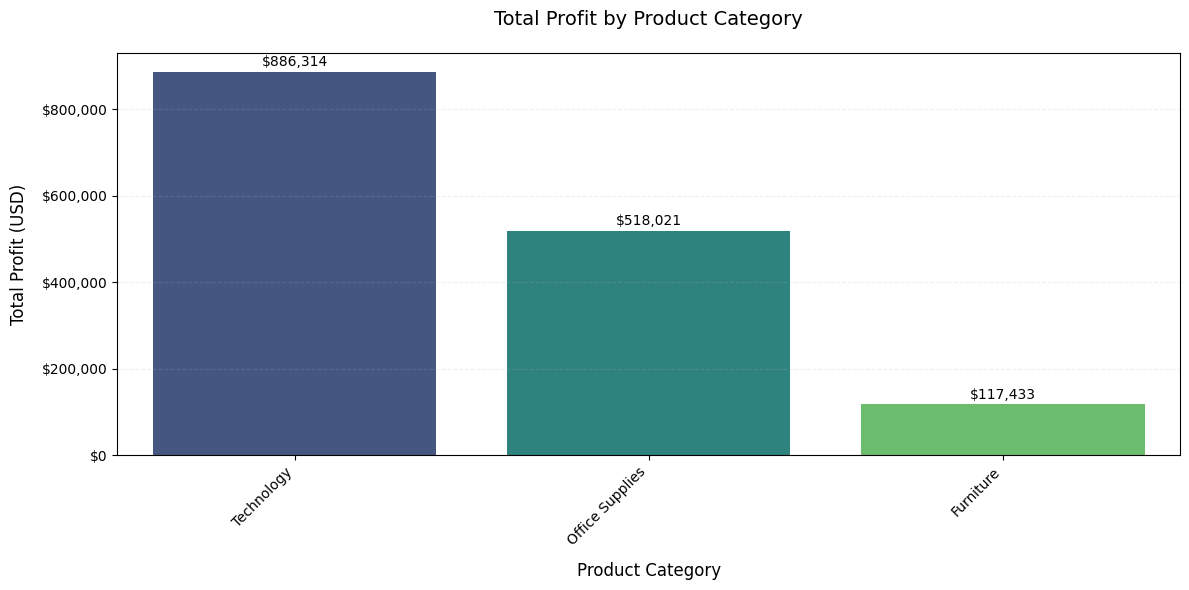

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Wider figure to accommodate category names

# Create bar plot of total profit by product category
sns.barplot(
    data=df,
    x='Product Category',  # Using exact column name from your DataFrame
    y='Profit',
    estimator=sum,
    errorbar=None,
    palette='viridis',  # Professional color palette
    order=df.groupby('Product Category')['Profit'].sum().sort_values(ascending=False).index  # Sort by profit
)

# Enhanced formatting
plt.title("Total Profit by Product Category", pad=20, fontsize=14)
plt.xlabel("Product Category", labelpad=10, fontsize=12)
plt.ylabel("Total Profit (USD)", labelpad=10, fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate long category names
plt.grid(axis='y', alpha=0.2, linestyle='--')  # Subtle grid lines

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Add value labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'${p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 7),
                      textcoords='offset points',
                      fontsize=10)

plt.tight_layout()  # Adjust layout
plt.show()

Profit by Product Category:
Product Category
Technology         $886,313.52
Office Supplies    $518,021.43
Furniture          $117,433.03


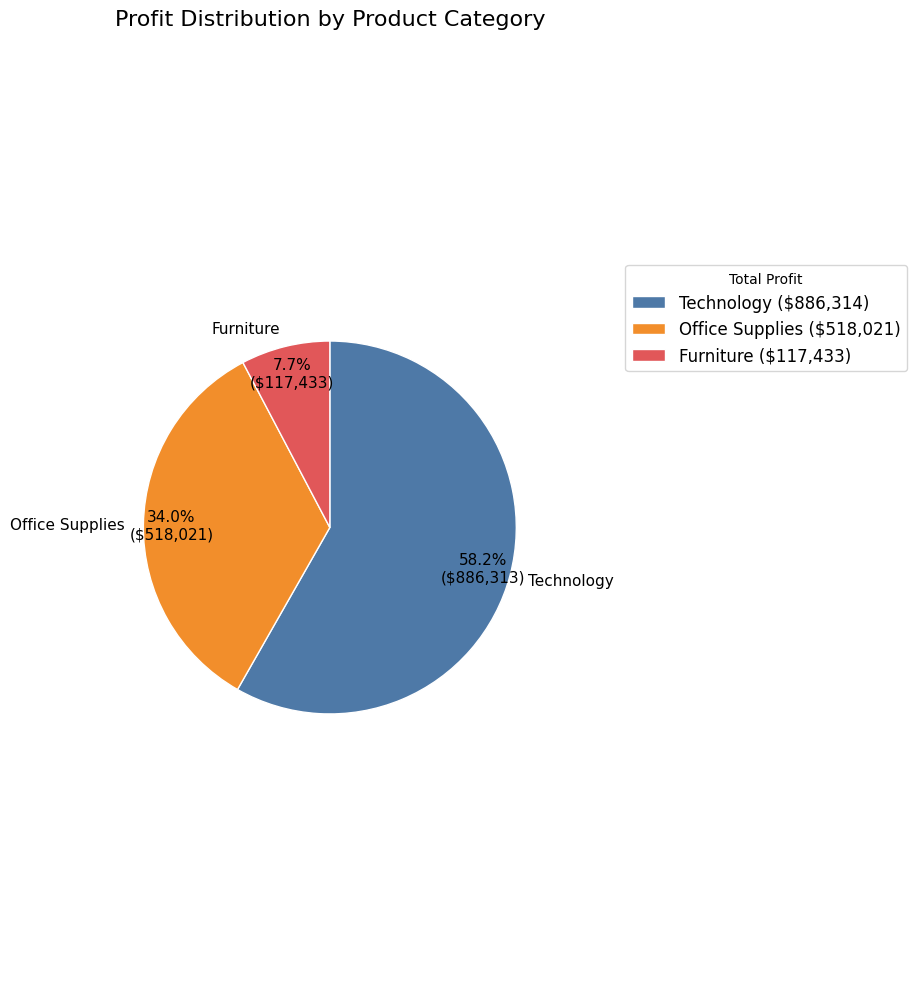

In [ ]:
import matplotlib.pyplot as plt

# Calculate total profit for each product category
# Using 'Product Category' column name from your DataFrame
category_profit = df.groupby("Product Category")["Profit"].sum().sort_values(ascending=False)

# Create pie chart visualization
plt.figure(figsize=(10, 10))  # Square layout for better proportions

# Generate the pie chart with professional styling:
plt.pie(
    category_profit,
    labels=category_profit.index,
    autopct=lambda p: f'{p:.1f}%\n(${p*sum(category_profit)/100:,.0f})',  # Shows both % and $ value
    startangle=90,  # Start first slice at top
    counterclock=False,  # Arrange slices clockwise
    colors=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'],  # Colorblind-friendly palette
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  # Clean borders
    textprops={'fontsize': 11},  # Label font size
    pctdistance=0.85  # Move percentage labels inward
)

# Add professional formatting
plt.title("Profit Distribution by Product Category\n", fontsize=16, pad=20)
plt.axis('equal')  # Perfect circle

# Add legend with absolute values
plt.legend(
    labels=[f"{cat} (${val:,.0f})" for cat, val in category_profit.items()],
    title="Total Profit",
    bbox_to_anchor=(1.2, 0.8),
    fontsize=12
)

# Display the underlying data
print("Profit by Product Category:")
print(category_profit.apply(lambda x: f"${x:,.2f}").to_string())

plt.tight_layout()
plt.show()

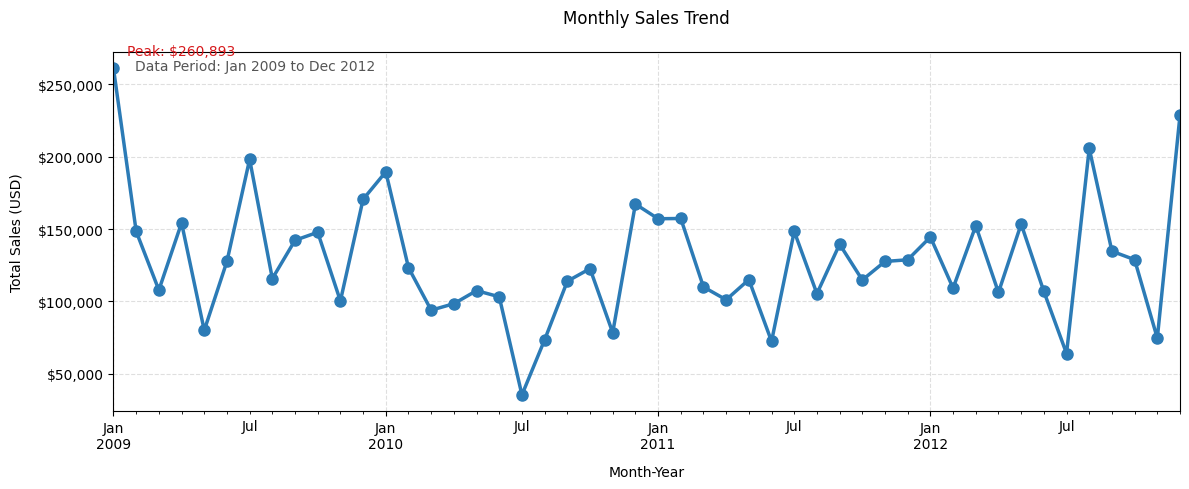

In [ ]:
# Set datetime index and resample to monthly sales totals
monthly_sales = (df.set_index("Order Date")
                  .resample("ME")["Sales"]  # 'ME' for month-end frequency
                  .sum())

# Create time series plot with professional formatting
plt.figure(figsize=(12, 5))  # Wider figure for better trend visibility

# Plot with enhanced styling
monthly_sales.plot(
    title="Monthly Sales Trend\n",  # Newline for spacing
    color='#2c7bb6',  # Professional blue
    linewidth=2.5,
    marker='o',        # Highlight data points
    markersize=8
)

# Add professional touches
plt.xlabel("Month-Year", labelpad=10)
plt.ylabel("Total Sales (USD)", labelpad=10)
plt.grid(True, linestyle='--', alpha=0.4)  # Dashed grid lines

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Add data period annotation
date_range = f"{monthly_sales.index[0].strftime('%b %Y')} to {monthly_sales.index[-1].strftime('%b %Y')}"
plt.annotate(f"Data Period: {date_range}",
             xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=10, color='#555555')

# Highlight peak sales month
peak_month = monthly_sales.idxmax()
plt.axvline(x=peak_month, color='#d7191c', linestyle=':', alpha=0.7)
plt.annotate(f'Peak: ${monthly_sales.max():,.0f}',
             xy=(peak_month, monthly_sales.max()),
             xytext=(10, 10), textcoords='offset points',
             color='#d7191c')

plt.tight_layout()
plt.show()

/tmp/ipython-input-125-1125354306.py:35: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-125-1125354306.py:36: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



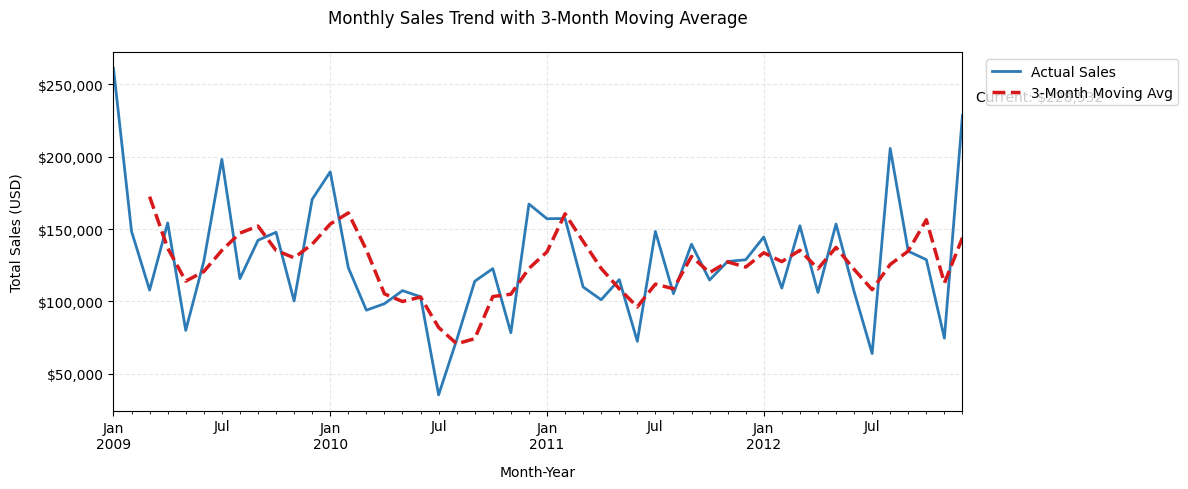

In [ ]:
# Set datetime index and resample to monthly sales totals
monthly_sales = (df.set_index("Order Date")
                  .resample("ME")["Sales"]  # 'ME' for month-end frequency
                  .sum())

# Create time series plot with professional formatting
plt.figure(figsize=(12, 5))

# Plot actual sales
monthly_sales.plot(
    title="Monthly Sales Trend with 3-Month Moving Average\n",
    color='#2c7bb6',  # Professional blue
    linewidth=2,
    label='Actual Sales'
)

# Add 3-month moving average with enhanced styling
monthly_sales.rolling(window=3).mean().plot(
    color='#d7191c',  # Complementary red
    linestyle='--',
    linewidth=2.5,
    label='3-Month Moving Avg'
)

# Add professional touches
plt.xlabel("Month-Year", labelpad=10)
plt.ylabel("Total Sales (USD)", labelpad=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Position legend in best location automatically
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Highlight key metrics
plt.annotate(f"Current: ${monthly_sales[-1]:,.0f}",
             xy=(monthly_sales.index[-1], monthly_sales[-1]),
             xytext=(10, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
df_time.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
NaT,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,NaT
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,NaT
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,NaT
NaT,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [ ]:
monthly_sales

,Sales
Order Date,
2009-01-31,260893.4565
2009-02-28,148375.2380
2009-03-31,107847.4645
2009-04-30,154214.1720
2009-05-31,80001.6000
2009-06-30,127660.9280
2009-07-31,198106.2625
2009-08-31,115775.7260
2009-09-30,142219.1890


/tmp/ipython-input-128-1822341233.py:38: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-128-1822341233.py:40: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



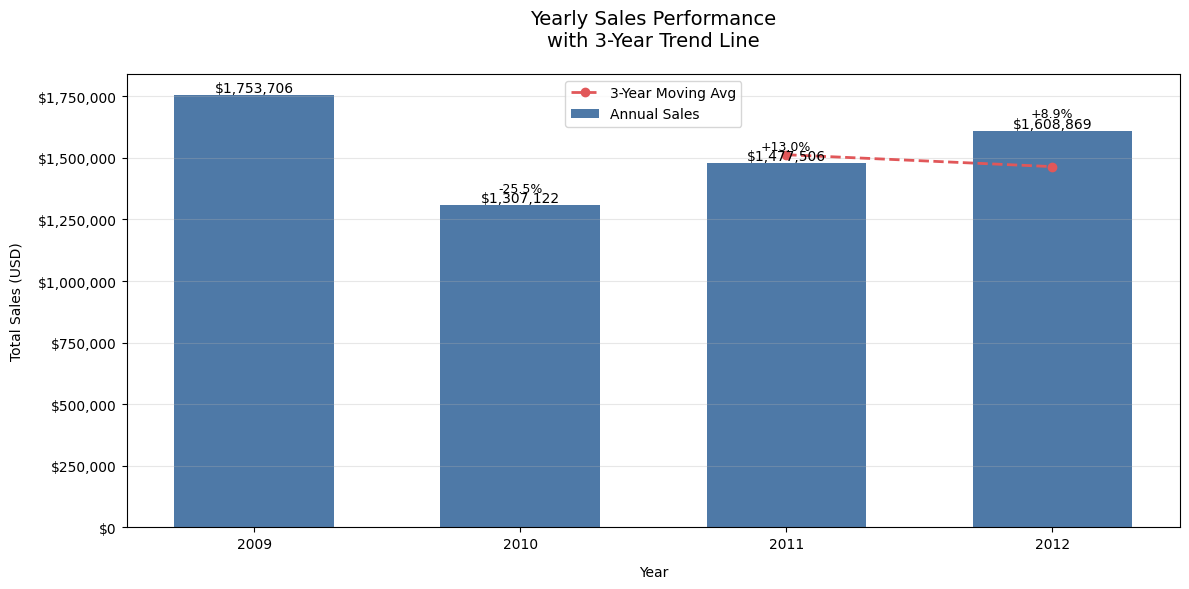

In [ ]:
# Yearly Sales Trend Analysis
yearly_sales = (df.set_index("Order Date")
                 .resample("YE")["Sales"]  # Year-End frequency
                 .sum())

plt.figure(figsize=(12, 6))

# Plot yearly bars
bars = plt.bar(yearly_sales.index.year, yearly_sales,
               color='#4e79a7', width=0.6,
               label='Annual Sales')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom',
             fontsize=10)

# Add 3-year moving average line
ma_3y = yearly_sales.rolling(3).mean()
plt.plot(yearly_sales.index.year, ma_3y,
         color='#e15759', marker='o',
         linestyle='--', linewidth=2,
         label='3-Year Moving Avg')

# Formatting
plt.title("Yearly Sales Performance\nwith 3-Year Trend Line", pad=20, fontsize=14)
plt.xlabel("Year", labelpad=10)
plt.ylabel("Total Sales (USD)", labelpad=10)
plt.xticks(yearly_sales.index.year)
plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Add growth rate annotations
for i in range(1, len(yearly_sales)):
    growth = (yearly_sales[i] - yearly_sales[i-1])/yearly_sales[i-1]*100
    plt.annotate(f'{growth:+.1f}%',
                xy=(yearly_sales.index.year[i], yearly_sales[i]),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

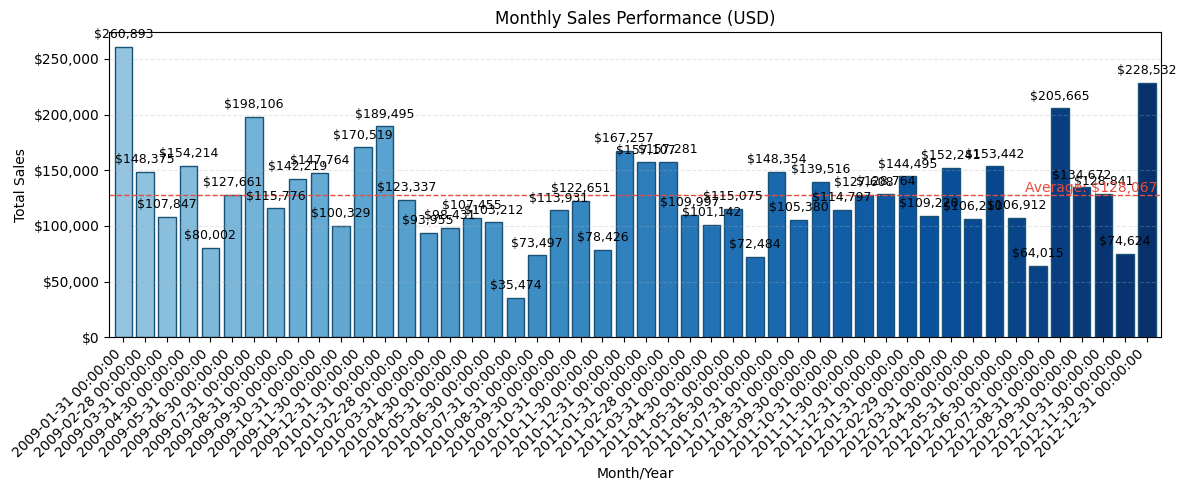

In [ ]:
# Calculate monthly sales totals using Month-End frequency
monthly_sales = df_time.resample("ME")["Sales"].sum()

# Create a professional bar chart visualization
plt.figure(figsize=(12, 5))

# Custom color palette - blue gradient for positive values
colors = plt.cm.Blues(np.linspace(0.4, 1, len(monthly_sales)))

monthly_sales.plot(kind='bar',
                  title="Monthly Sales Performance (USD)",
                  ylabel="Total Sales",
                  xlabel="Month/Year",
                  color=colors,
                  edgecolor='#1a5276',  # Darker edge for definition
                  width=0.8)  # Optimal bar width

# Enhanced formatting for clarity:
plt.xticks(rotation=45, ha='right')  # Rotate labels with right alignment
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Subtle horizontal grid

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Add value labels on top of each bar
for i, value in enumerate(monthly_sales):
    plt.text(i, value + (0.02*monthly_sales.max()),
             f'${value:,.0f}',
             ha='center',
             va='bottom',
             fontsize=9)

# Add a reference line for average performance
avg_sales = monthly_sales.mean()
plt.axhline(y=avg_sales, color='#e74c3c', linestyle='--', linewidth=1)
plt.text(len(monthly_sales)-0.5, avg_sales*1.02,
         f'Average: ${avg_sales:,.0f}',
         color='#e74c3c',
         ha='right')

plt.tight_layout()  # Prevent label cutoff
plt.show()

/tmp/ipython-input-133-2614690700.py:70: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



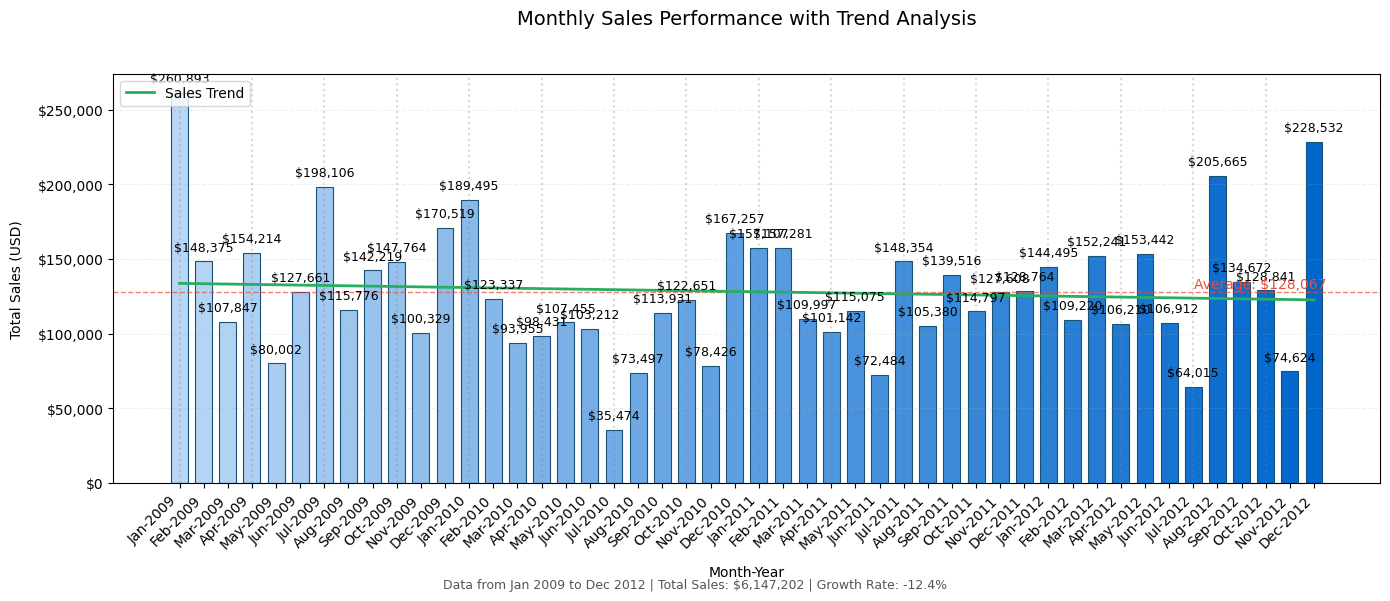

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Calculate monthly sales totals
monthly_sales = df_time.resample("ME")["Sales"].sum()

# Create custom blue gradient colormap
cmap = LinearSegmentedColormap.from_list('blue_gradient', ['#e6f2ff', '#0066cc'])

# Create figure with professional layout
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Generate bar plot with enhanced features
bars = ax.bar(monthly_sales.index.strftime('%b-%Y'),  # Format dates as 'Jan-2023'
              monthly_sales.values,
              color=cmap(np.linspace(0.2, 1, len(monthly_sales))),
              edgecolor='#1a5276',
              linewidth=0.8,
              width=0.7)

# Add professional formatting
plt.title("Monthly Sales Performance with Trend Analysis\n", pad=20, fontsize=14)
plt.ylabel("Total Sales (USD)", labelpad=10)
plt.xlabel("Month-Year", labelpad=10)
plt.xticks(rotation=45, ha='right')

# Format y-axis as currency
ax.yaxis.set_major_formatter('${x:,.0f}')

# Add value labels with smart positioning
for bar in bars:
    height = bar.get_height()
    offset = 0.02 * monthly_sales.max()
    va = 'bottom' if height >= 0 else 'top'
    ax.text(bar.get_x() + bar.get_width()/2.,
            height + offset if height >=0 else height - offset,
            f'${height:,.0f}',
            ha='center',
            va=va,
            fontsize=9)

# Add reference lines and annotations
avg_sales = monthly_sales.mean()
ax.axhline(avg_sales, color='#e74c3c', linestyle='--', linewidth=1, alpha=0.7)
ax.text(len(monthly_sales)-0.5, avg_sales*1.02,
        f'Average: ${avg_sales:,.0f}',
        color='#e74c3c',
        ha='right')

# Add trend line (linear regression)
x = np.arange(len(monthly_sales))
z = np.polyfit(x, monthly_sales, 1)
p = np.poly1d(z)
ax.plot(x, p(x), color='#27ae60', linewidth=2, linestyle='-',
        label='Sales Trend')

# Add seasonality indicators (quarter markers)
for i, date in enumerate(monthly_sales.index):
    if date.month in [1, 4, 7, 10]:  # Quarter starts
        ax.axvline(i, color='gray', linestyle=':', alpha=0.3)

# Add legend and grid
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.tight_layout()

# Add footer with data info (CORRECTED VERSION)
growth_rate = ((monthly_sales[-1]/monthly_sales[0])-1)*100
plt.figtext(0.5, 0.01,
            f"Data from {monthly_sales.index[0].strftime('%b %Y')} to {monthly_sales.index[-1].strftime('%b %Y')} | "
            f"Total Sales: ${monthly_sales.sum():,.0f} | "
            f"Growth Rate: {growth_rate:.1f}%",
            ha='center', fontsize=9, color='#555555')

plt.show()

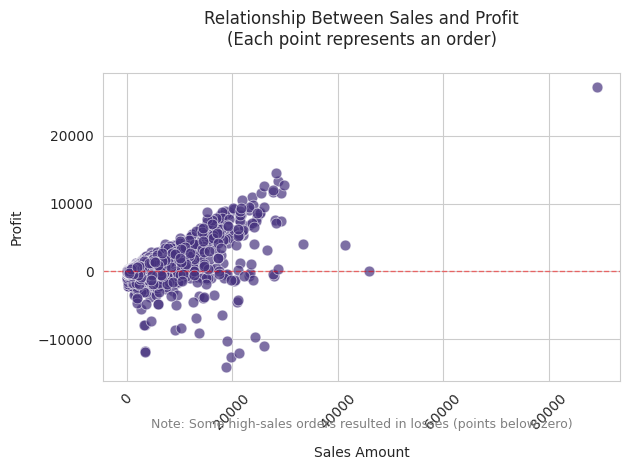

In [ ]:
# Set style for better aesthetics
sns.set_style("whitegrid")

# Create scatter plot with improved parameters
scatter = sns.scatterplot(
    data=df,
    x="Sales",
    y="Profit",
    alpha=0.7,        # Add transparency to see dense areas
    edgecolor='w',     # White edges for better point distinction
    linewidth=0.5,     # Thin border around points
    s=60              # Slightly larger point size
)

# Add title and labels with improved formatting
plt.title("Relationship Between Sales and Profit\n(Each point represents an order)",
          pad=20, fontsize=12)
plt.xlabel("Sales Amount", labelpad=10)
plt.ylabel("Profit", labelpad=10)

# Add reference line at y=0 to clearly show profit/loss threshold
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Formatting improvements
plt.xticks(rotation=45)
plt.tight_layout()

# Add informative caption
plt.text(
    x=0.5, y=-0.15,
    s="Note: Some high-sales orders resulted in losses (points below zero)",
    transform=scatter.transAxes,
    ha='center',
    fontsize=9,
    color='gray'
)

plt.show()

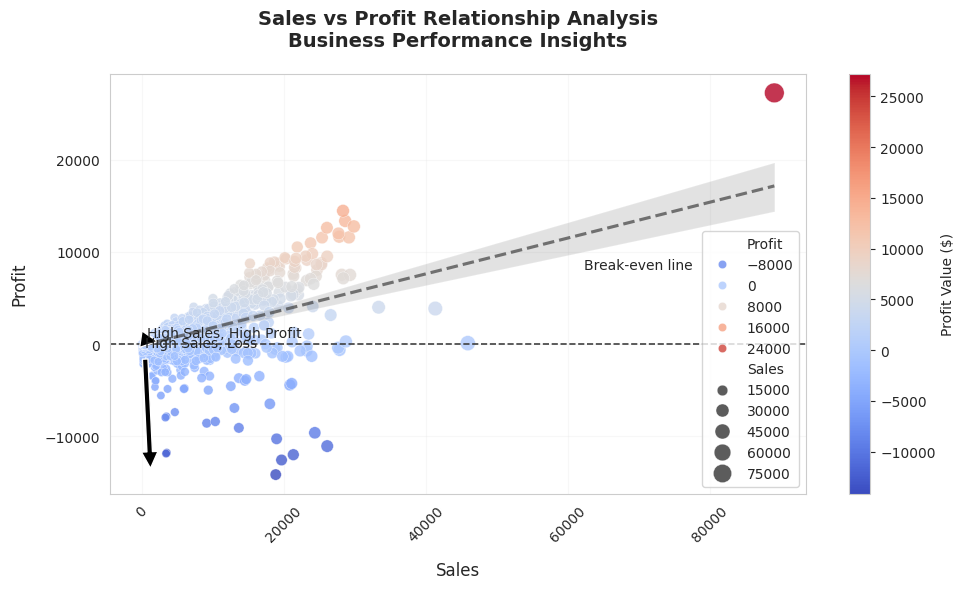

In [ ]:
# Set professional style and palette
sns.set_style("whitegrid", {'grid.color': '.9'})
sns.set_palette("viridis")

plt.figure(figsize=(10, 6), dpi=100)  # Larger figure size for clarity

# Create enhanced scatter plot
scatter = sns.scatterplot(
    data=df,
    x="Sales",
    y="Profit",
    hue="Profit",  # Color by profit value
    palette="coolwarm",  # Warm colors for profit, cool for loss
    size="Sales",  # Size by sales amount
    sizes=(30, 200),  # Range of point sizes
    alpha=0.8,
    edgecolor='w',
    linewidth=0.3
)

# Add reference lines and annotations
plt.axhline(y=0, color='#404040', linestyle='--', linewidth=1.2)
plt.annotate('Break-even line', xy=(max(df["Sales"])*0.7, 0.5),
             xytext=(max(df["Sales"])*0.7, max(df["Profit"])*0.3),
             arrowprops=dict(arrowstyle='->'), fontsize=10)

# Enhanced titles and labels
plt.title("Sales vs Profit Relationship Analysis\nBusiness Performance Insights",
          fontsize=14, pad=20, fontweight='semibold')
plt.xlabel("Sales ($)", fontsize=12, labelpad=12, fontweight='medium')
plt.ylabel("Profit ($)", fontsize=12, labelpad=12, fontweight='medium')

# Format axes
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)

# Add informative elements
plt.annotate('High Sales, High Profit',
             xy=(df["Sales"].quantile(0.8), df["Profit"].quantile(0.8)),
             xytext=(df["Sales"].quantile(0.6), df["Profit"].quantile(0.9)),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.annotate('High Sales, Loss',
             xy=(df["Sales"].quantile(0.7), df[df["Profit"]<0]["Profit"].min()),
             xytext=(df["Sales"].quantile(0.5), df["Profit"].quantile(0.1)),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

# Add colorbar for profit values
norm = plt.Normalize(df["Profit"].min(), df["Profit"].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Profit Value ($)', ax=scatter)

# Add regression line to show trend
sns.regplot(data=df, x="Sales", y="Profit",
            scatter=False,
            ci=95,
            line_kws={'color':'#404040', 'linestyle':'--', 'alpha':0.7})

plt.tight_layout()
plt.show()

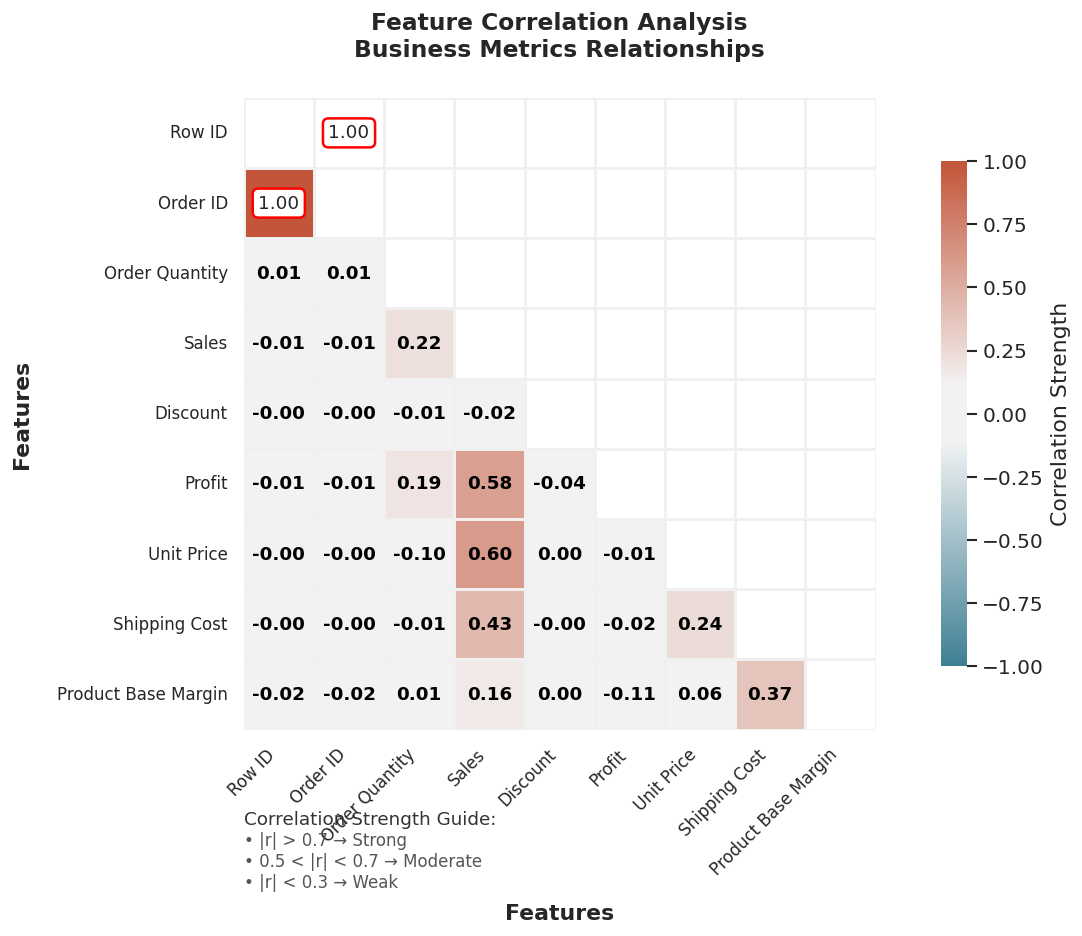

In [ ]:
# Calculate correlation matrix for numeric columns only
corr = df.corr(numeric_only=True)

# Set up the figure with professional styling
plt.figure(figsize=(12, 8), dpi=120)
sns.set(font_scale=1.1)
sns.set_style("white")

# Custom diverging colormap (blue-white-red)
cmap = sns.diverging_palette(220, 20, as_cmap=True, sep=30, center="light")

# Generate the heatmap with enhanced parameters
heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",                # Show 2 decimal places
    cmap=cmap,                # Custom colormap
    center=0,
    vmin=-1,
    vmax=1,
    annot_kws={
        'size': 11,
        'weight': 'bold',
        'color': 'black'      # Black text for better contrast
    },
    linewidths=0.75,          # Slightly thicker grid lines
    linecolor='#f0f0f0',      # Light gray grid lines
    square=True,
    cbar_kws={
        'shrink': 0.8,        # Slightly smaller colorbar
        'label': 'Correlation Strength'
    },
    mask=np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle
)

# Improve title and axis labels
plt.title(
    "Feature Correlation Analysis\nBusiness Metrics Relationships",
    pad=25,
    fontsize=14,
    fontweight='bold'
)
plt.xlabel("Features", labelpad=15, fontweight='semibold')
plt.ylabel("Features", labelpad=15, fontweight='semibold')

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Highlight significant correlations with boxes
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i != j and abs(corr.iloc[i, j]) > 0.7:  # Strong correlations
            heatmap.text(
                j + 0.5,
                i + 0.5,
                f'{corr.iloc[i, j]:.2f}',
                ha='center',
                va='center',
                fontsize=11,
                bbox=dict(
                    boxstyle='round,pad=0.3',
                    facecolor='white',
                    edgecolor='red' if corr.iloc[i, j] > 0 else 'blue',
                    linewidth=1.5
                )
            )

# Add correlation strength legend
plt.annotate(
    "Correlation Strength Guide:",
    xy=(0, -0.15),
    xycoords='axes fraction',
    fontsize=11,
    color='#333333'
)
plt.annotate(
    "• |r| > 0.7 → Strong\n• 0.5 < |r| < 0.7 → Moderate\n• |r| < 0.3 → Weak",
    xy=(0, -0.25),
    xycoords='axes fraction',
    fontsize=10,
    color='#555555'
)

plt.tight_layout()
plt.show()

In [ ]:
corr

,Row ID,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
Row ID,1.000000,0.999961,0.011103,-0.007560,-0.003289,-0.006605,-0.004115,-0.004713,-0.022726
Order ID,0.999961,1.000000,0.010953,-0.007792,-0.003213,-0.006820,-0.004304,-0.004582,-0.022557
Order Quantity,0.011103,0.010953,1.000000,0.220582,-0.009649,0.194655,-0.104284,-0.011457,0.007839
Sales,-0.007560,-0.007792,0.220582,1.000000,-0.019686,0.581960,0.602521,0.434578,0.156759
Discount,-0.003289,-0.003213,-0.009649,-0.019686,1.000000,-0.037128,0.001332,-0.001956,0.004079
Profit,-0.006605,-0.006820,0.194655,0.581960,-0.037128,1.000000,-0.008854,-0.021362,-0.112985
Unit Price,-0.004115,-0.004304,-0.104284,0.602521,0.001332,-0.008854,1.000000,0.239959,0.057838
Shipping Cost,-0.004713,-0.004582,-0.011457,0.434578,-0.001956,-0.021362,0.239959,1.000000,0.373826
Product Base Margin,-0.022726,-0.022557,0.007839,0.156759,0.004079,-0.112985,0.057838,0.373826,1.000000


# 🧠 Correlation Matrix Analysis 🔍

## 🔢 What is a Correlation Matrix?
A **correlation** value ranges between **-1 and +1**, indicating how strongly two variables are related:  

- **🔵 +1**: Perfect positive relationship (as X increases, Y increases)  
- **🔴 -1**: Perfect negative relationship (as X increases, Y decreases)  
- **⚪ 0**: No relationship between the two columns  

---

## 🔍 Simple Analysis of Results

### ✅ 1. Sales ↔ Profit: **Value = 0.58**  
- **Explanation:** Higher sales usually lead to higher profits (but not always!).  
- **Insight:** Strong but not perfect positive relationship → Some sales may not be profitable!  

### ✅ 2. Unit Price ↔ Sales: **Value = 0.60**  
- **Explanation:** Higher unit prices correlate with higher overall sales.  
- **Insight:** Maybe premium products have higher perceived value or sell in larger volumes.  

### ✅ 3. Profit ↔ Order Quantity: **Value = 0.19**  
- **Explanation:** Order quantity has a slight positive link with profit.  
- **Insight:** Bulk purchases might be more profitable, but the effect isn’t very strong.  

### ⚠️ 4. Discount ↔ Profit: **Value = -0.037**  
- **Explanation:** Discounts tend to reduce profits (negative, though weak).  
- **Insight:** Discounts may not be very profitable → Need deeper investigation!  

### ⚠️ 5. Shipping Cost ↔ Profit: **Value = -0.02**  
- **Explanation:** Shipping costs have a minor negative impact on profit.  
- **Insight:** Optimizing delivery methods could help.  

### 🟥 6. Profit ↔ Product Base Margin: **Value = -0.11**  
- **Surprising!** Theoretical profit margins negatively correlate with actual profit.  
- **Insight:** Products expected to be high-margin may not actually be profitable → Could be due to discounts, shipping, or other hidden costs.  

---

## 🧠 Key Takeaways (Insights)

| **Finding**                          | **Explanation** |
|--------------------------------------|----------------|
| **Higher sales → Usually more profit** | But exceptions exist! |
| **Higher unit price → More sales**    | Especially for premium/luxury products. |
| **Heavy discounts → Lower profit**    | Needs careful management ⚠️ |
| **Shipping costs → Reduce profit**    | Optimize delivery methods. |
| **Theoretical ≠ Actual profit margins** | Don’t rely on assumptions—real data matters! |
